## Exploring Performance of Proposed Real Cutoff Function

### From Section 1 - Data Preparation, Notation & Function Definition

As in section 1, we will continue to use $X$ to denote total character count for an author's consolidated work, $n$ to denote the preliminary cutoff, which we set to be 4500, and $r$ to denote our rounding function. We note that we will be using numpy's rounding function 'around', which rounds to the nearest even integer when faced with '.5'. The real cutoff is then defined:

$$
RC = r\left(\frac{X}{r(X/n)}\right)
$$

### Is There Any Difference in Output?

The first question we need to ask: Does this function's output change significantly from the preliminary cutoff of 4500? 

We can determine this by plotting the function. Arbitrarily plugging works into an online character counter, we see that most works are contained to under 30,000 characters, with the exception of the two Wuxia authors Jin Yong and Gu Long, whose novels contain character counts numbering in the 100,000's. Correspondingly, we choose two plotting ranges: One from 10,000 to 100,000; The other, specifically for the long Wuxia novels, from 100,000 to 1,000,000.

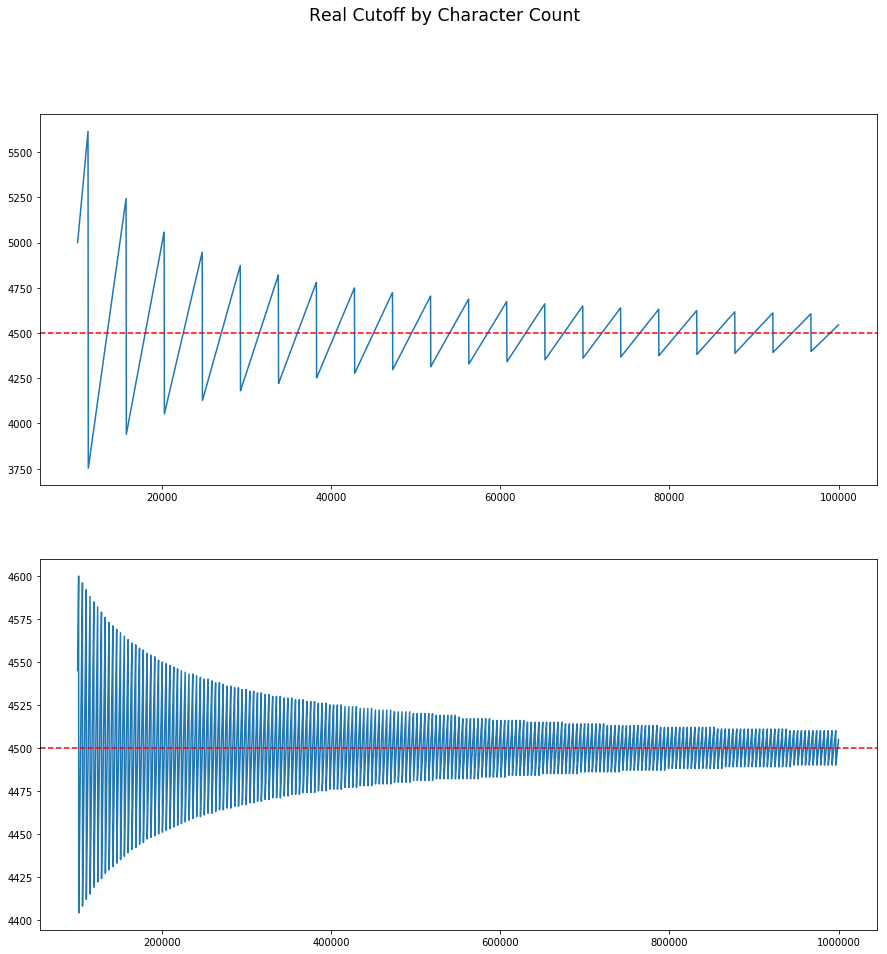

In [4]:
import matplotlib.pyplot as plt
import numpy as np

n = 4500
xpoints = np.linspace(10000, 100000, num=3000) # small range, gap size of 30
xpointl = np.linspace(100000, 1000000, num=9000) # large range, gap size of 100

def real_cut(x, init_samsize):
    return np.around(x/np.around(x/init_samsize))

fig, q1 = plt.subplots(2, figsize=(15,15))
fig.suptitle('Real Cutoff by Character Count', size='xx-large')
q1[0].plot(xpoints, real_cut(xpoints, n))
q1[0].axhline(n, ls='--', c='r')
q1[1].plot(xpointl, real_cut(xpointl, n))
q1[1].axhline(n, ls='--', c='r')

Note that while the first plot seems to contain far less data points than 3000, it is due to data points behaving linearly.

3000


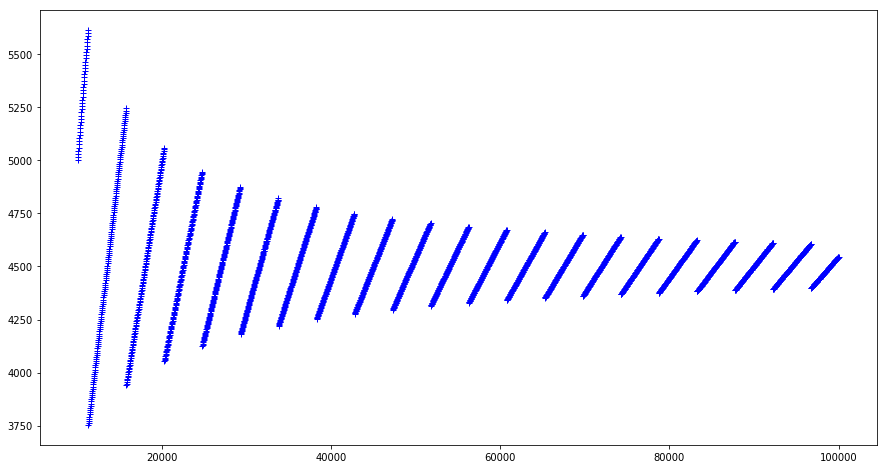

In [2]:
print(len(xpoints))
plt.figure(figsize=(15,8))
plt.plot(xpoints, real_cut(xpoints, n), 'b+')

We can see that both plots oscillate with decreasing amplitude around the preliminary cutoff. While for the two authors with higher character counts the amplitude is significantly smaller, and we see no guarantee of the real cutoff being different from the preliminary cutoff for arbitrarily high character counts, this is enough to say that the function output as a whole is different from the constant preliminary cutoff at least for the purposes of this project.

### How is the Function's Performance?

The next question to explore: Will implementing the function help with taking care of undersized samples? 

This time, we will plot the size of the remaining sample against word count.

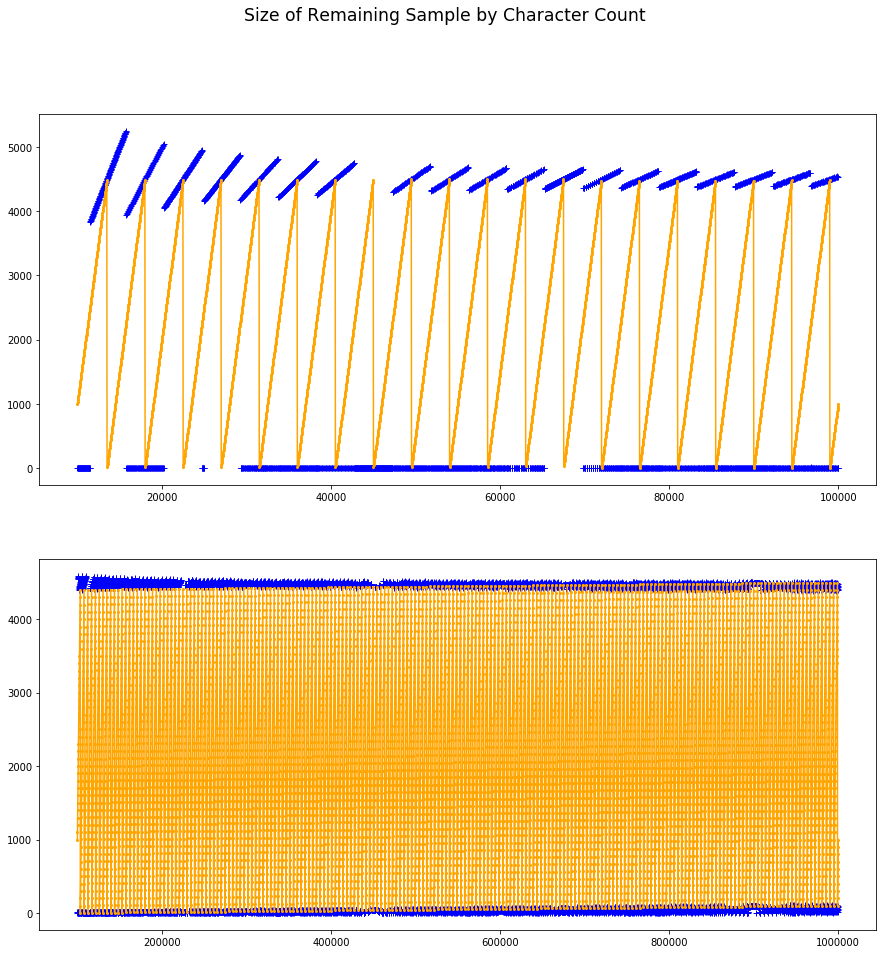

In [3]:
# function to get size of last sample when using the real cutoff function
def rc_rdr(x, init_samsize):
    return x % real_cut(x, init_samsize)

fig, q2 = plt.subplots(2,figsize=(15,15))
fig.suptitle('Size of Remaining Sample by Character Count', size='xx-large')
q2[0].plot(xpoints, rc_rdr(xpoints, n), 'b+')
q2[0].plot(xpoints, xpoints % n, color='orange', marker='o', ms=2)
q2[1].plot(xpointl, rc_rdr(xpointl, n), 'b+')
q2[1].plot(xpointl, xpointl % n, color='orange', marker='o', ms=2)

For the plots of both ranges, we can see what would be the size of the remaining samples (orange) sandwiched between the sizes of the remaining samples after the real cutoff function is implemented (blue). From this we conclude the function performs extradordinarily well at reducing the number of undersized samples, reducing samples to either extremely small or very large sizes. Paired with the second remediation measure proposed in section 1, small remainders can be appended to the second-last sample with little effect, while large remainders will have no problem serving as standalone samples. 